# Breast_cancer_logistic regression

▶ **PROBLEM STATMENT** : Is to predict wether
tumor is malignant (cancerous) or benign (non-cancerous) based on certain features of the tumor

▶ **MODEL USED** : logistic regression

so problem is sovled by using logistic reggression and so our goal is to reduce loss function ,

▶ steups to perform (data preprocessing)
Import Libraries and Dataset

   1. Handle Missing Data

   2. Encoding Categorical Data

   3. Outlier Detection and Removal

   4. Feature Scaling

   5. Feature Selection

   6. Handle Imbalanced Data

   7. Splitting Dataset





In [1]:
#importing important lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline
sns.set_style('darkgrid')

# step-0. Loading breast cancer data set using sklearn in df

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()




DATA  EXPLORATION 

In [2]:
# step-1. Exploring the data
# so our data is in form of 2d array, we need to convert it into dataframe

# main keys we want is data target-> (M = malignant, B = benign) and feature names 
# we will use this feature names as columns for our dataframe

df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

# now we will add target column to our dataframe
df['target']=cancer['target']
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
print("-----------------")
x=df.shape
print("data_frame rows/column = ",x)
print("-----------------")
df.info()

-----------------
data_frame rows/column =  (569, 31)
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area err


 In data analysis, particularly with Pandas in Python, both isnull() and isna() are functions used to detect missing values (null values) in a dataset. These functions help identify where the missing data exists within a DataFrame or Series.

# isnull():
 Purpose: Detects missing values in a DataFrame or Series.
 Output: Returns a boolean DataFrame/Series of the same shape, where True indicates missing values (NaN) and False indicates non-missing values.
# isna():
 Purpose: Also detects missing values, exactly like isnull().
 Output: Same as isnull() — returns a boolean DataFrame/Series.
 Difference Between isnull() and isna():
 There is no functional difference between isnull() and isna() in Pandas. They are aliases of each other, meaning both functions perform the same operation.
# Why Both Exist:
 Consistency: isnull() was introduced earlier in Pandas, and isna() was added later for consistency with other libraries like R, where NA (Not Available) is often used to represent missing data.

In [4]:
#now check null values
#by using isnul() and sum() function from pandas 
df.isnull().sum() 

# so there is no null values in the data set

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# checking catergorical values and removing them 

In [5]:
#step-2

# now lets check for categorical values
# by using pandas lib

print(df.dtypes)
# so there is no categorical values in the data set


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

# OUTLIER DETECTION AND REMOVAL 

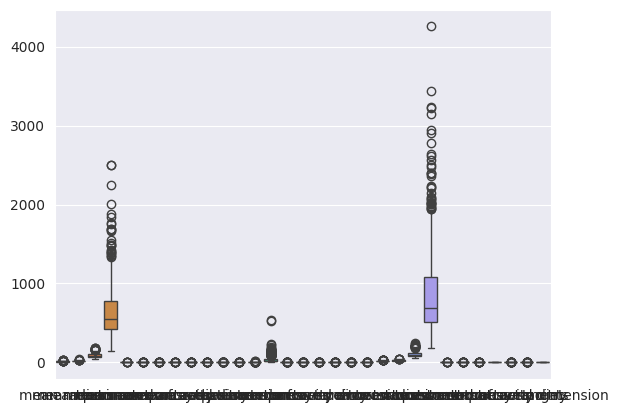

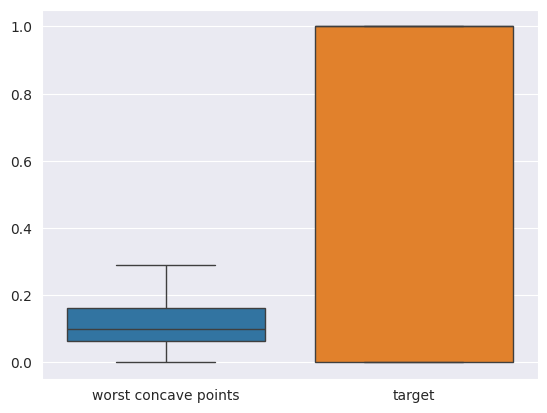

In [6]:
# now detect outliers 
sns.boxplot(df)
plt.show()
#boxplot for each feature using a loop but problem is that it will make a huge list of boxplots 
# for i in df.columns:
#     sns.boxplot(df[i])
#     plt.show()

#so by the plot above we can see that there are outliers in the data set except for the 4rd last feature and 'tareget' column
sns.boxplot(df[['worst concave points','target']])
plt.show()

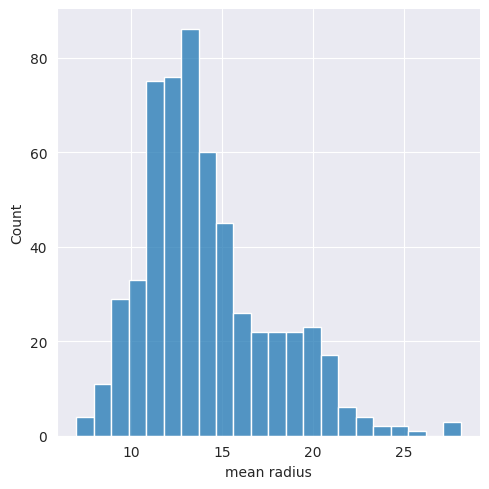

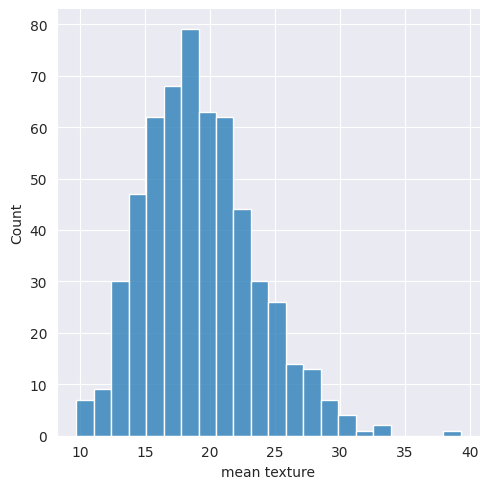

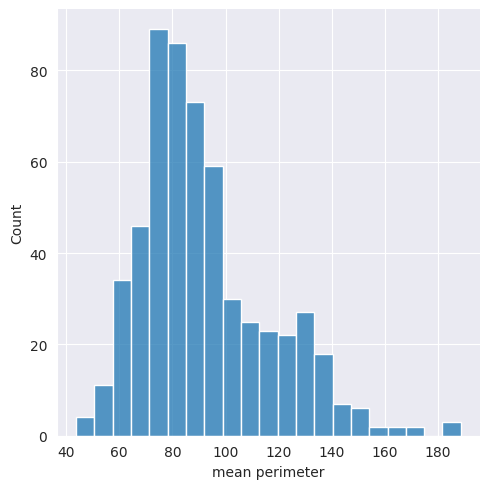

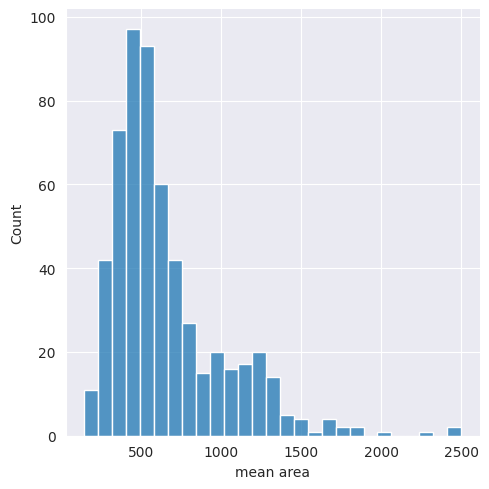

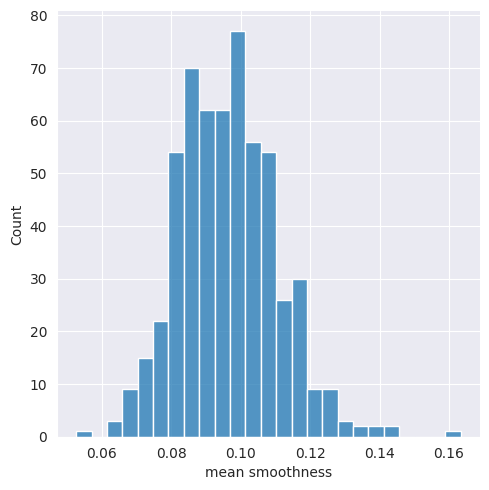

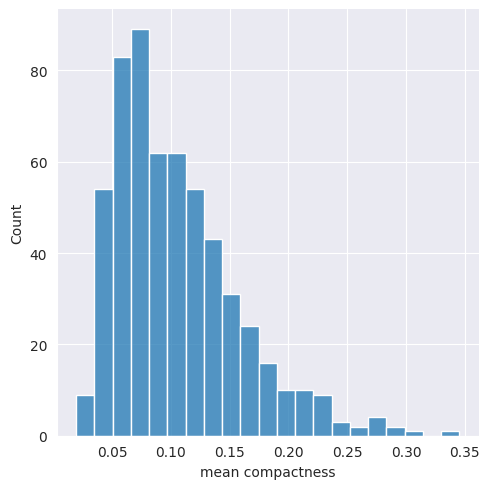

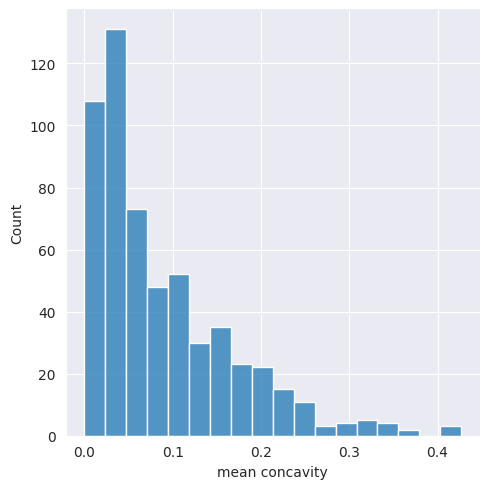

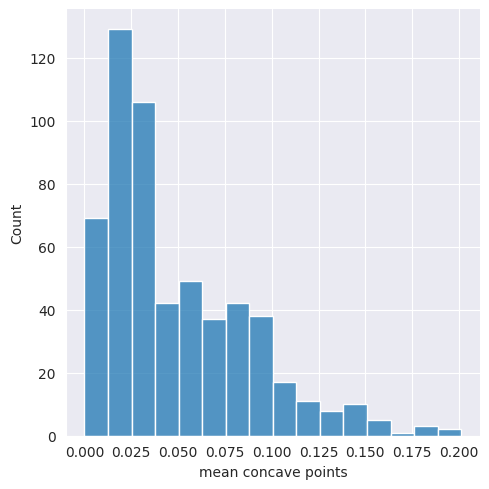

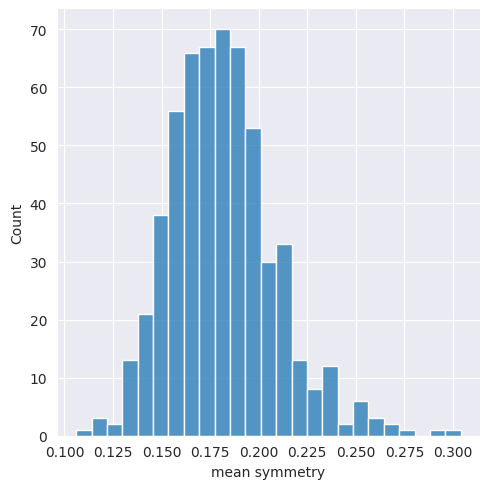

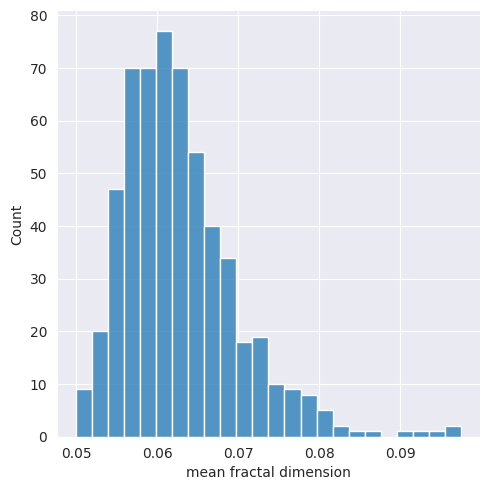

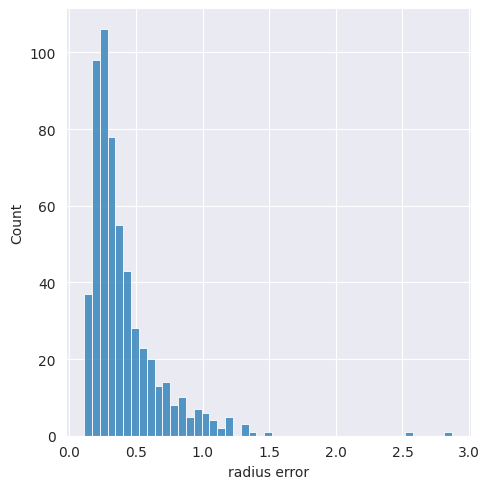

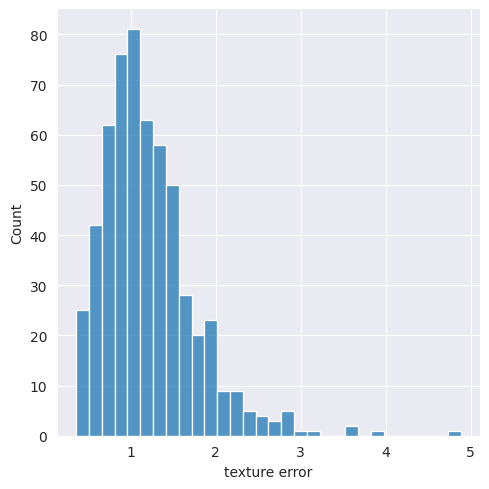

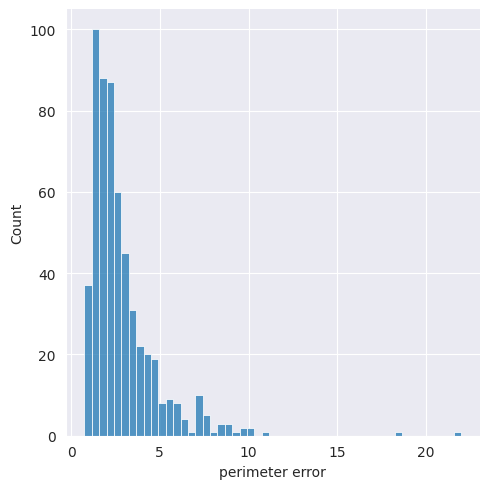

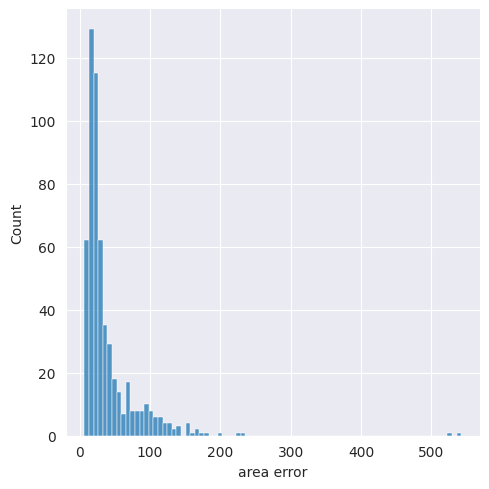

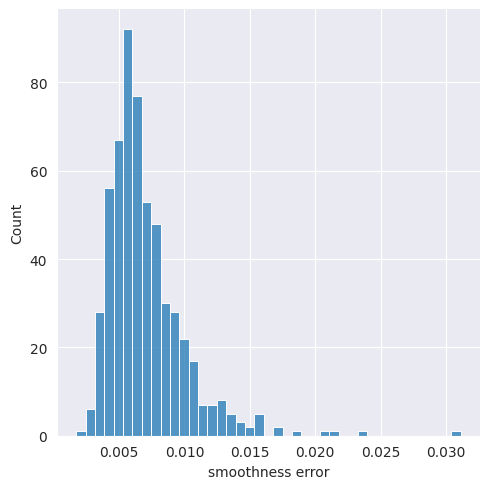

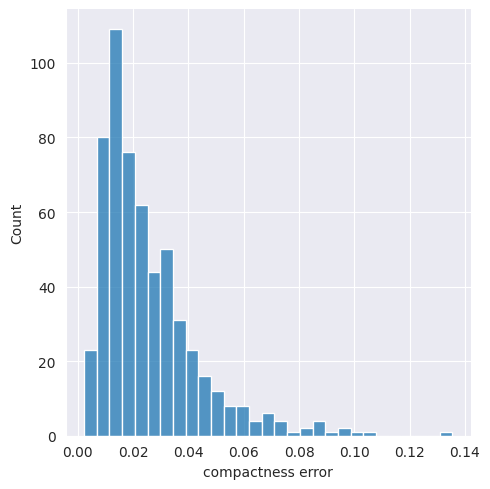

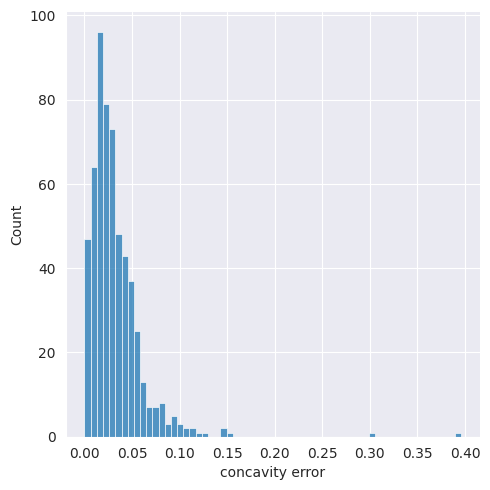

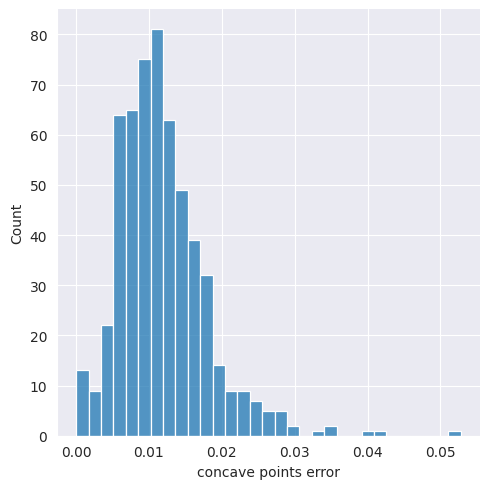

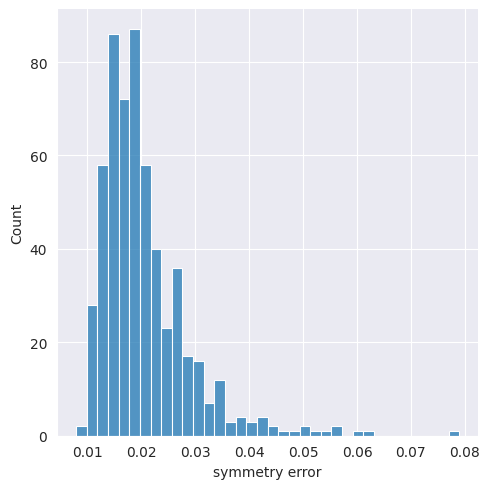

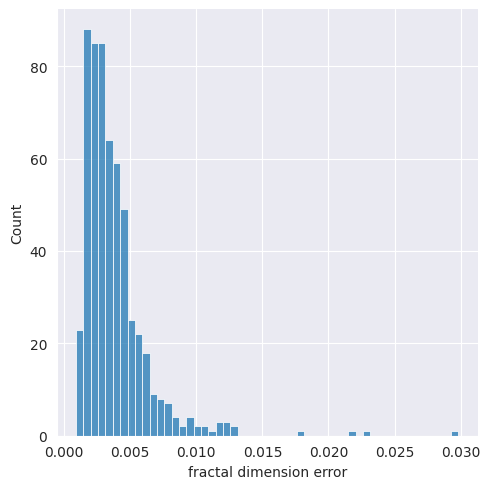

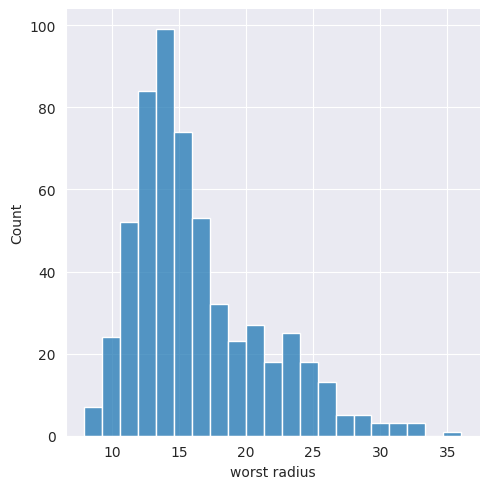

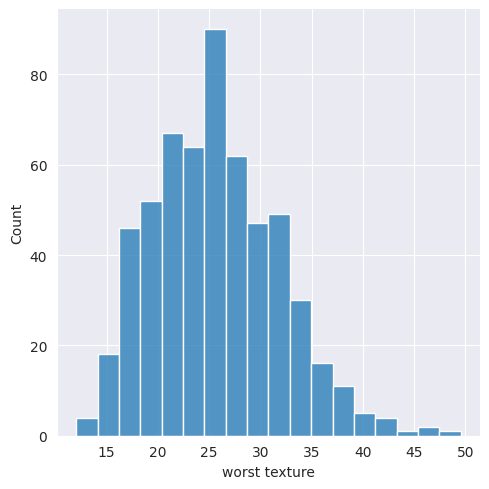

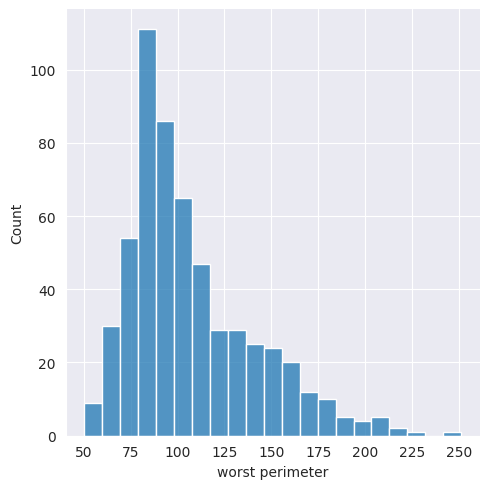

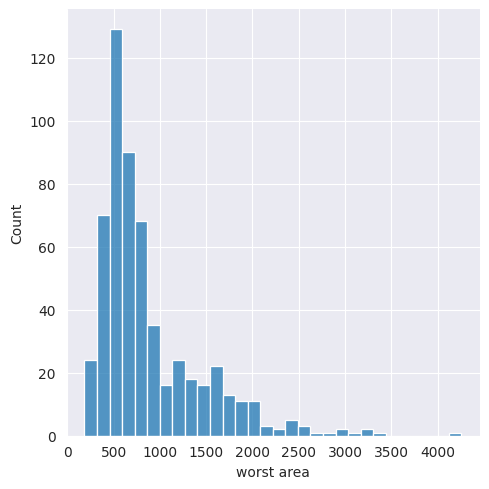

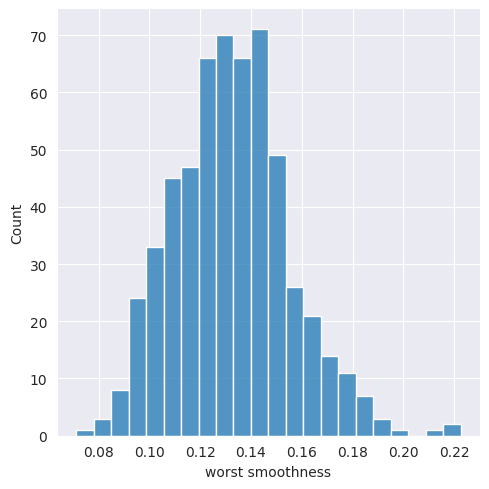

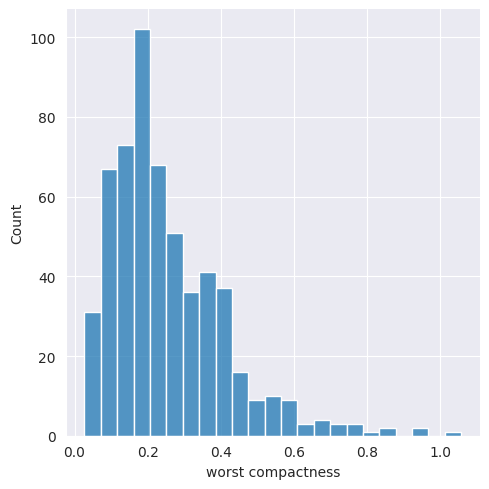

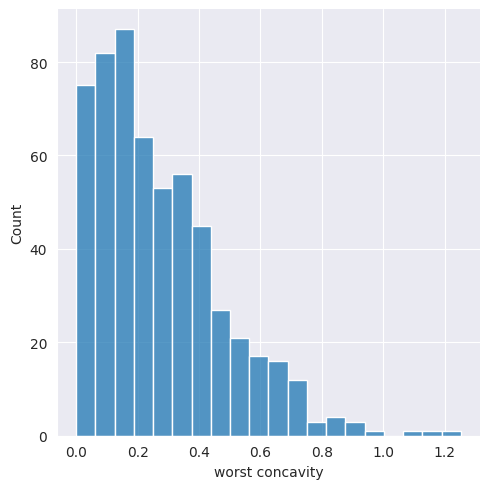

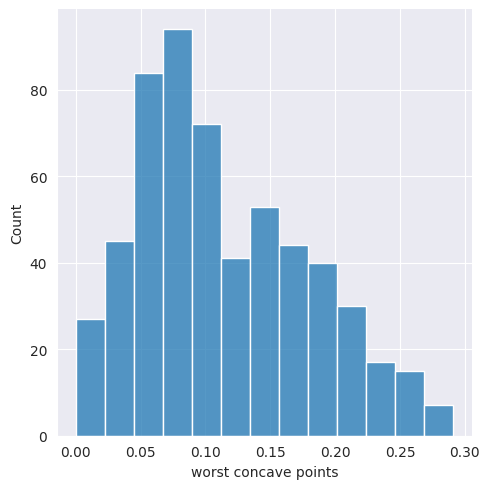

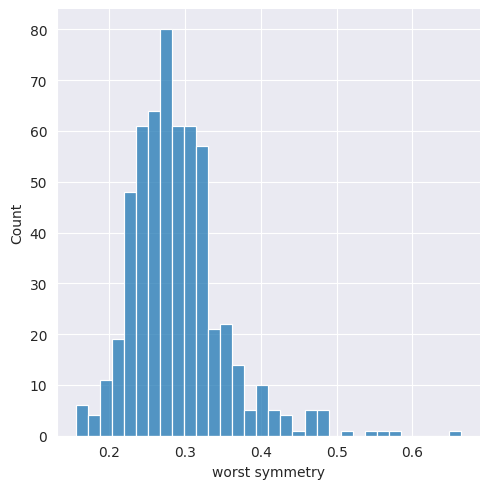

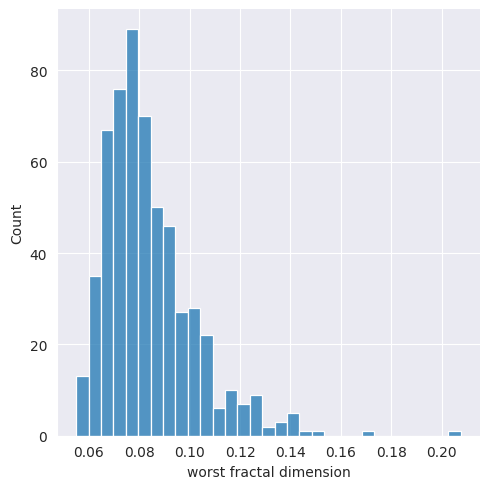

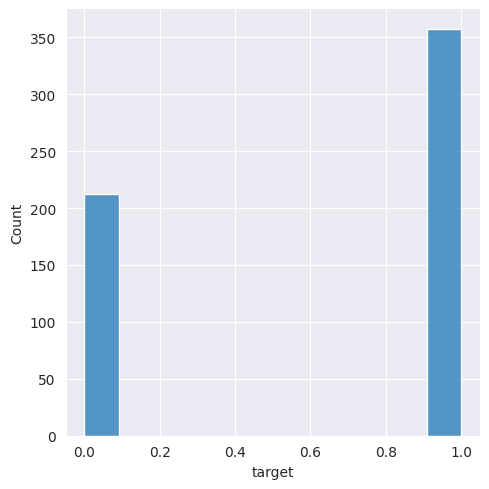

In [7]:
# plotting distplot for each feature to check the distribution of the data and to check if the data is normally distributed or not  and based on that we can decide to use iqr or zqr to remove outliers for each feature
for i in df.columns:
    sns.displot(df[i])
    plt.show()

In [8]:
#this is how we should have performed the outlier removal process but we will not do it here beacause in this case outliers are important and removing them will affect the model accuracy by 2% which you could check by comenting out  the below code and running the model



 # we use IQR -> for  skewed  graph
# we use Z-score -> for normal distribution graph

#beacuse all the features are not normally distributed so we will use IQR 
# we will use IQR for removing outliers
#BY USING A LOOP WE WILL REMOVE ALL THE OUTLIERS FROM THE df expect for the target column
# Make a copy of the original DataFrame
# df_filtered = df.copy()

# for i in df.columns:
#     if i != 'target':
#         Q1 = df_filtered[i].quantile(0.25)
#         Q3 = df_filtered[i].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df_filtered = df_filtered[(df_filtered[i] > lower_bound) & (df_filtered[i] < upper_bound)]

# sns.boxplot(df)
# plt.show()
# #printing the prior one for comparison
# sns.boxplot(df_filtered)
# plt.show()



# feature_selection


after removal---------------------


<Axes: >

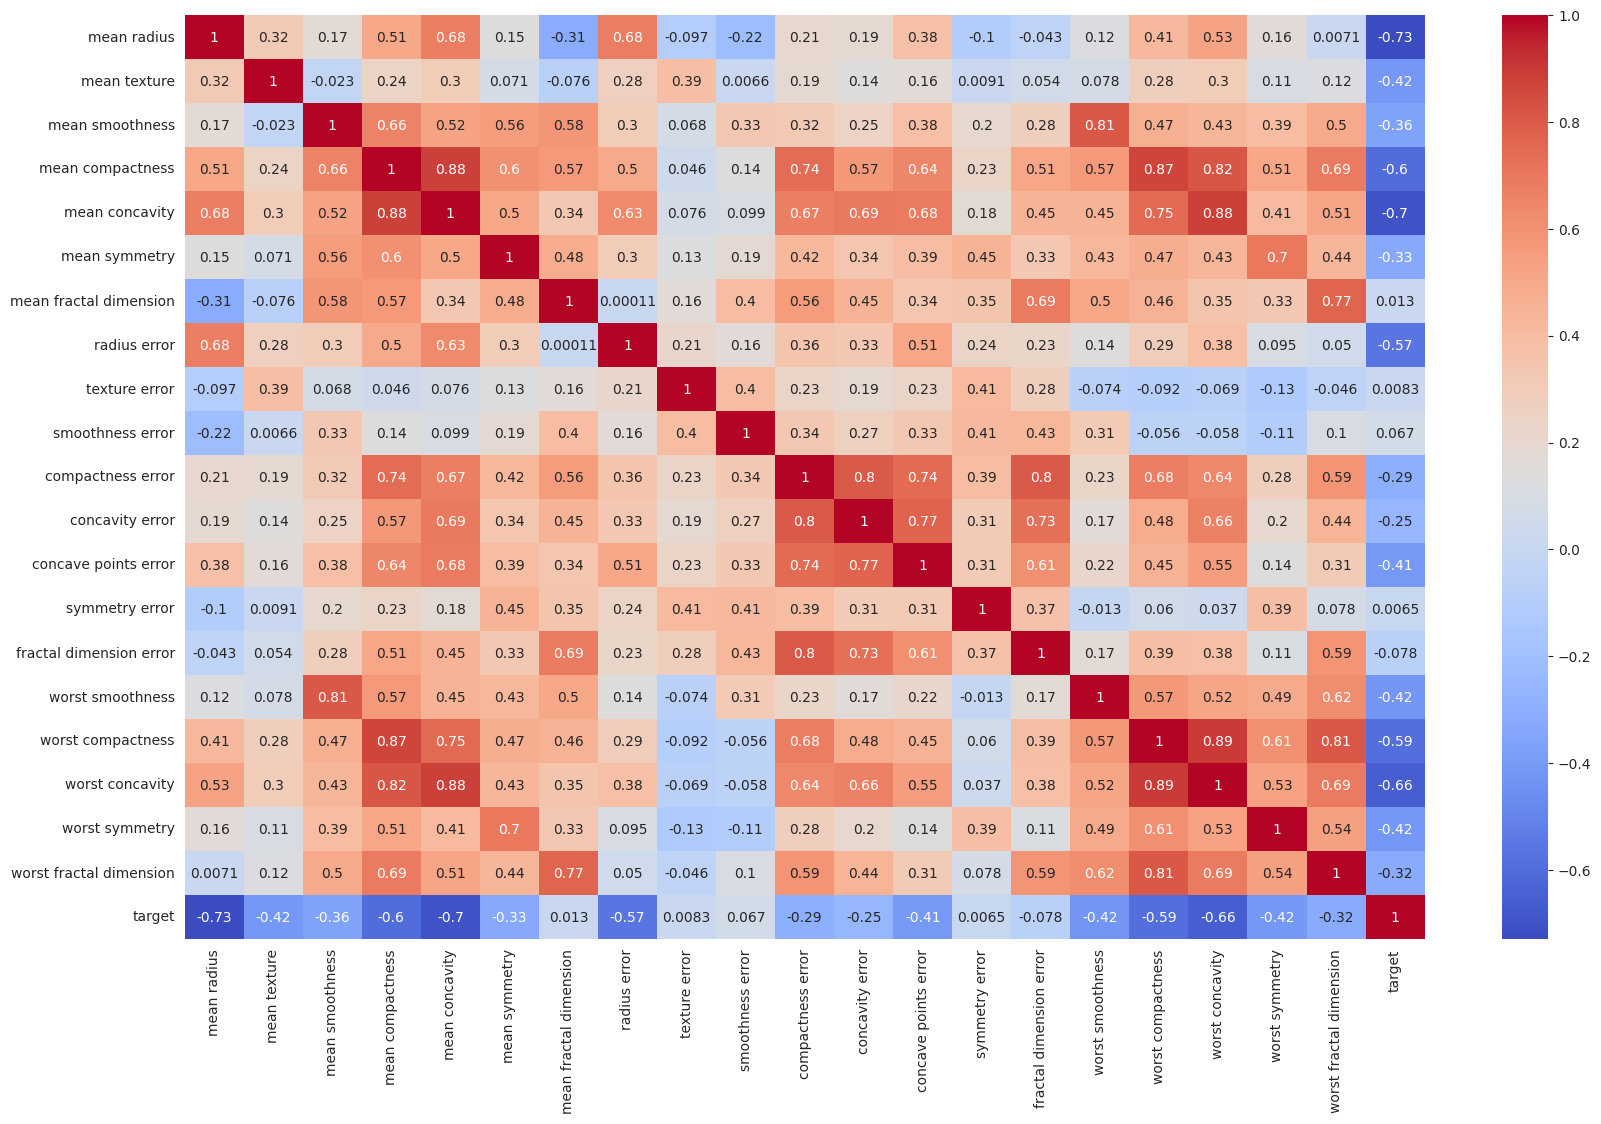

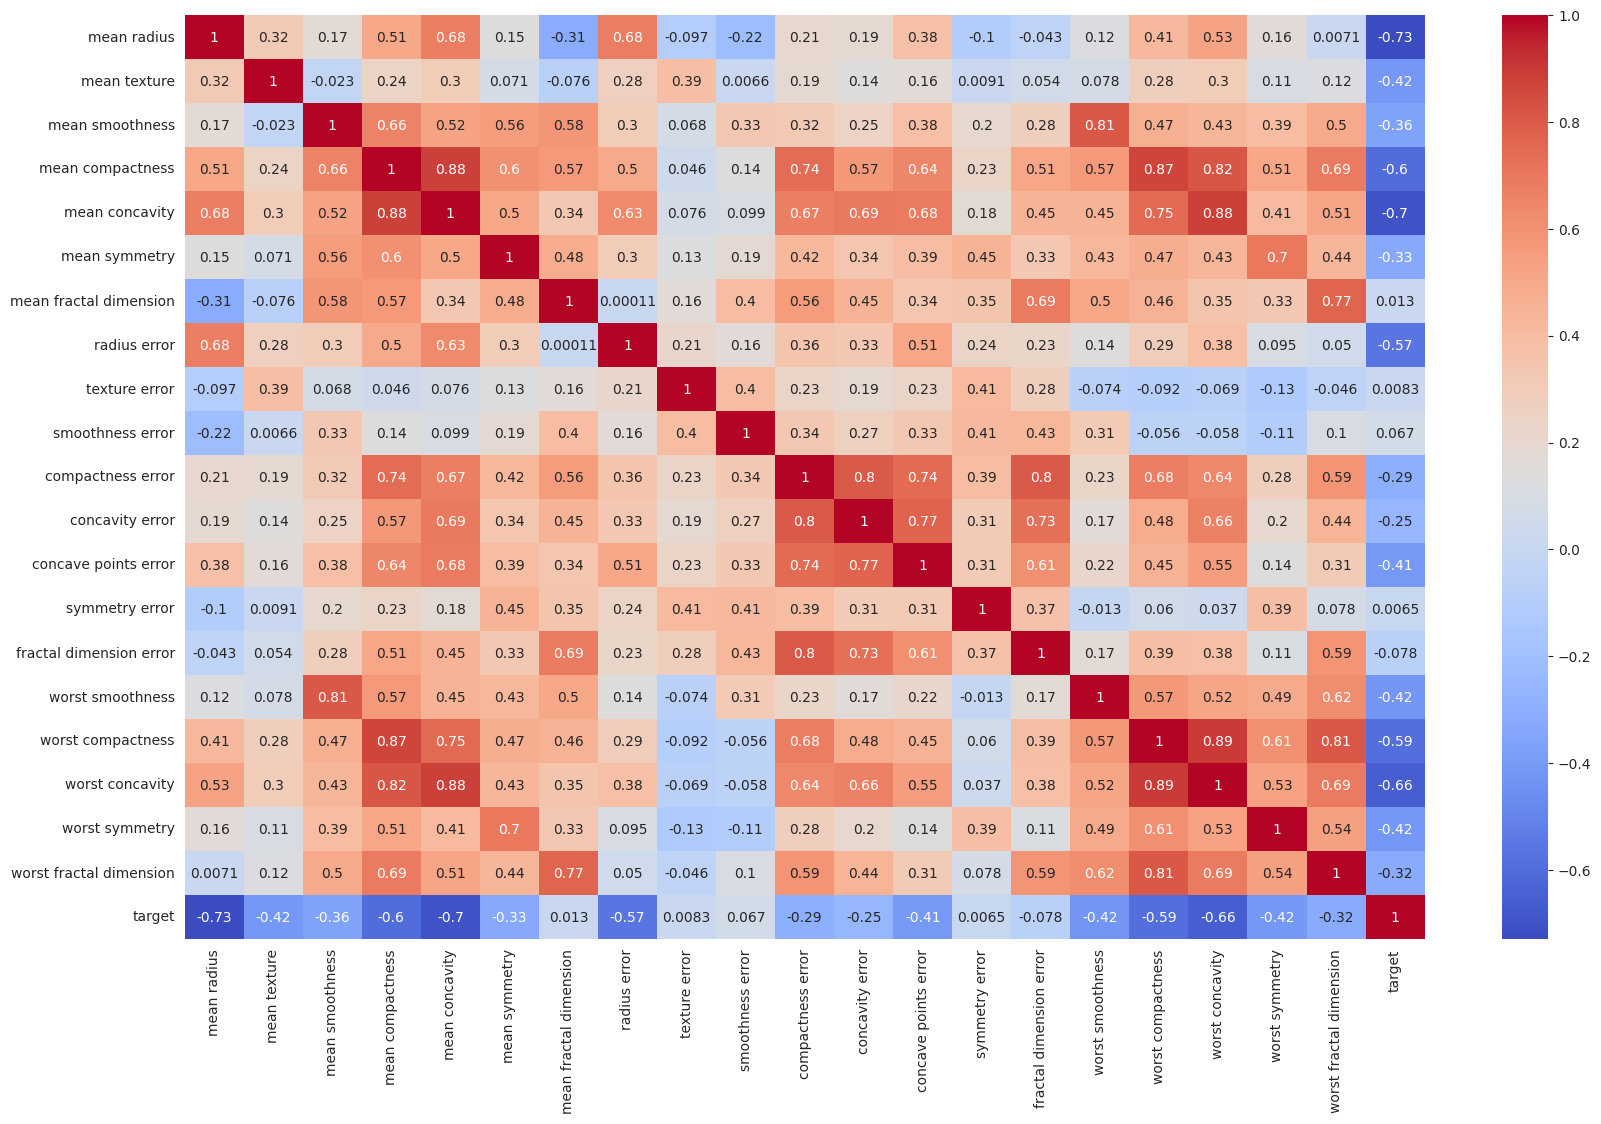

In [33]:
#finding correlation matrix 
corr = df.corr()
# print(corr)
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,cmap='coolwarm')


corr_matrix = df.corr().abs()
threshold = 0.9
# Find highly correlated features
highly_correlated = np.where(corr_matrix > threshold)
highly_correlated = [(corr_matrix.index[x], corr_matrix.columns[y])
                    for x, y in zip(*highly_correlated) if x != y and x < y]


# Remove one feature from each highly correlated pair
features_to_remove = [pair[1] for pair in highly_correlated]
df = df.drop(columns=features_to_remove)
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# splitting the data for train and testing 

point to be noted if you are commenting out above code for outlier removal change df to df_filtered in code below 
X = df_filtered.drop('target', axis=1)
Y = df_filtered['target']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
X = df.drop('target', axis=1)
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



# feature scaling 

In [10]:
#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#feature selection  

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

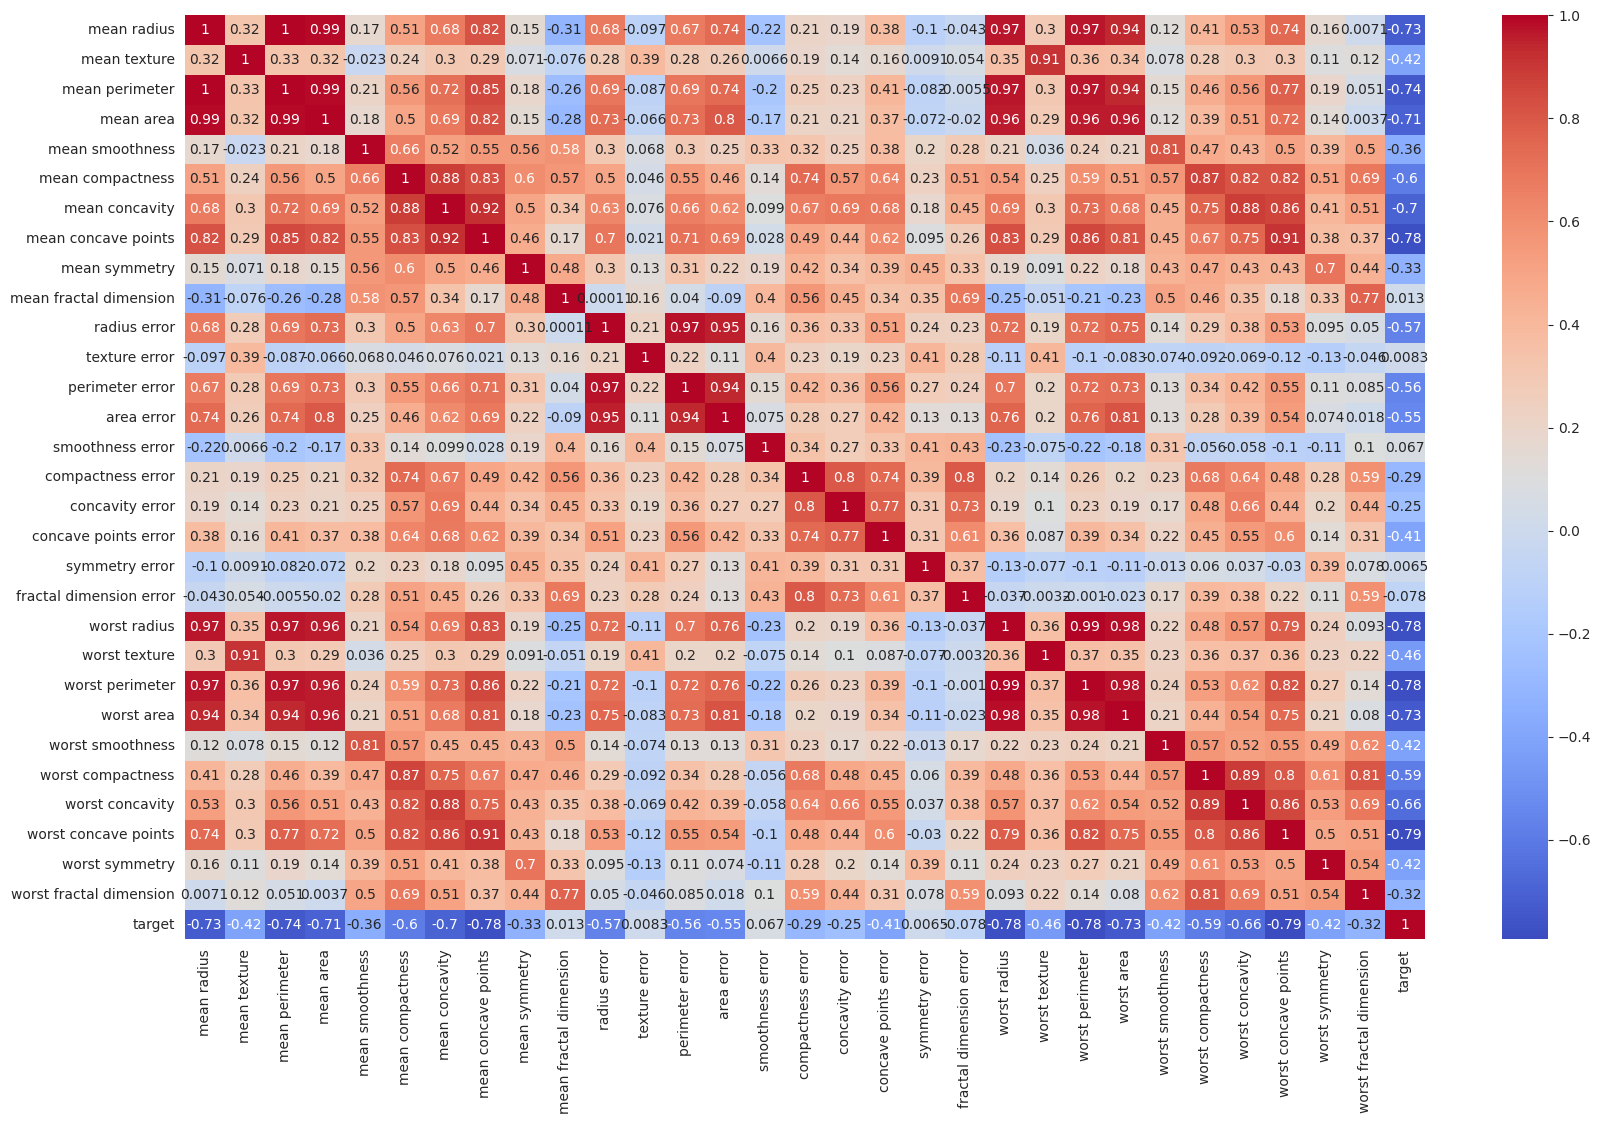

<Axes: >

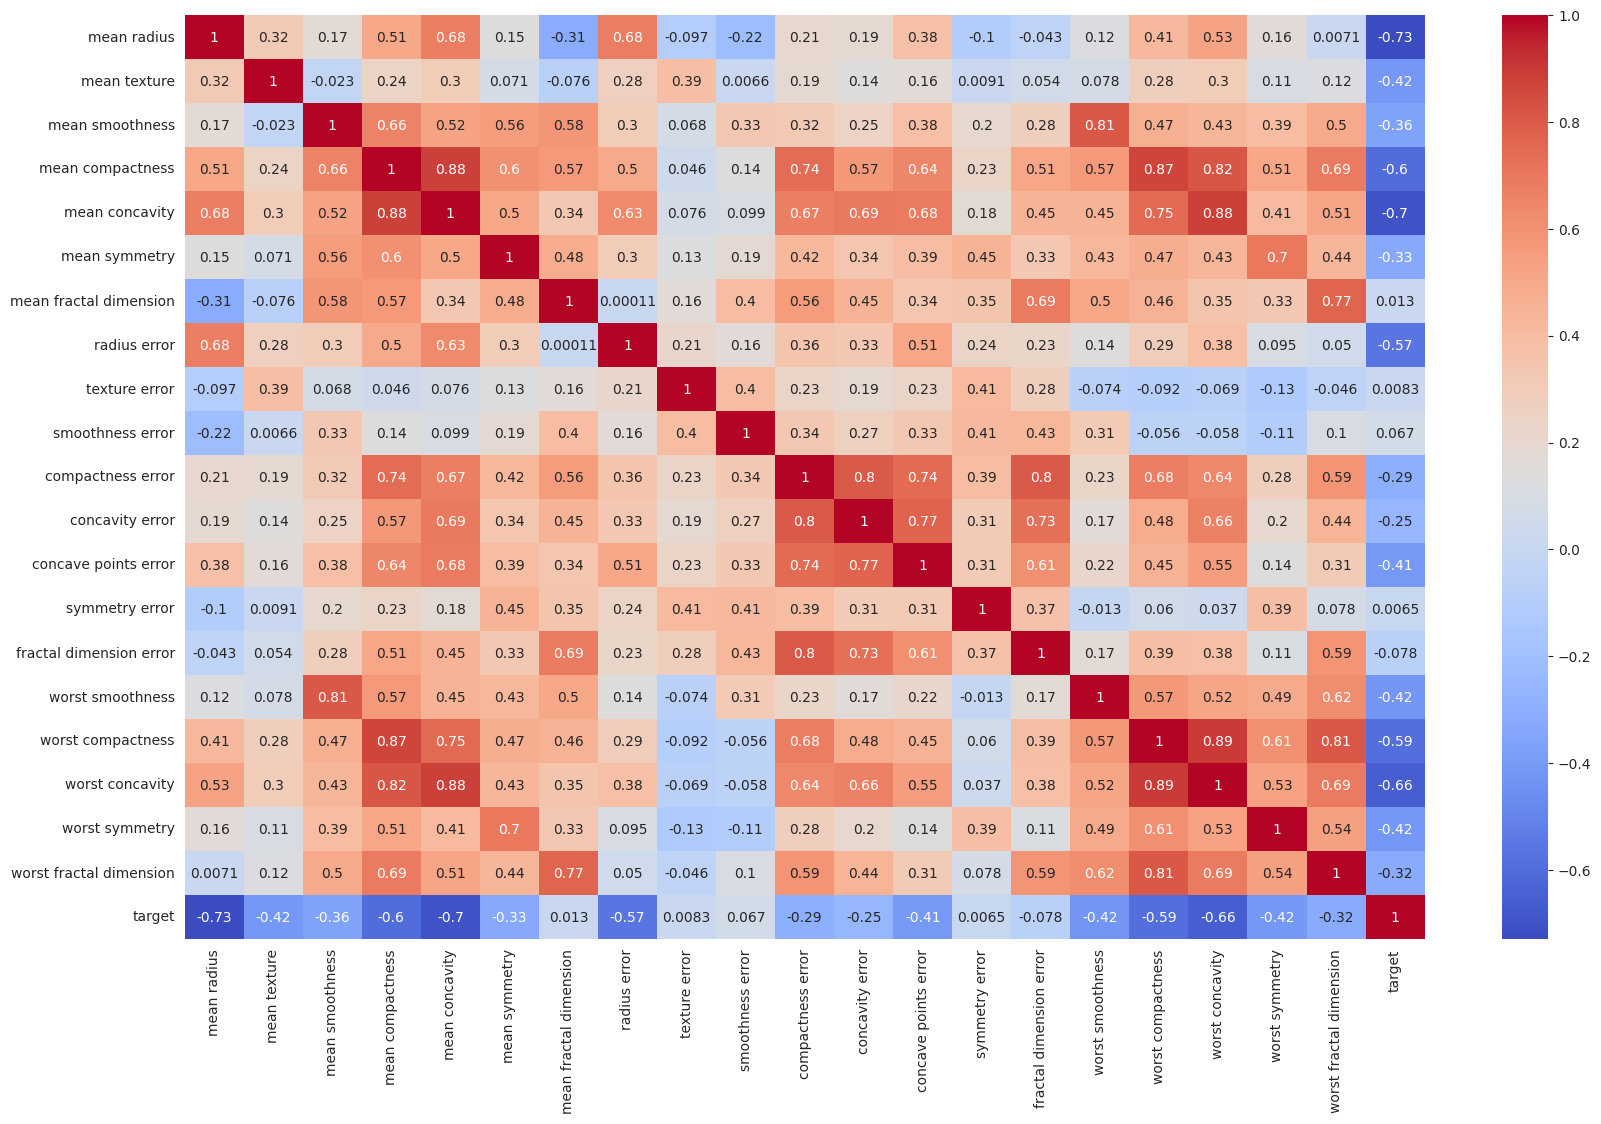

# model training & accuracy measures

In [27]:

# Model training
model = LogisticRegression(max_iter=500) 
model.fit(X_train_scaled, Y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Accuracy
print("Accuracy: ", accuracy_score(Y_test, predictions))

Accuracy:  0.9736842105263158
